<a href="https://colab.research.google.com/github/rgaguiar/deep-learning-RH/blob/main/DeepLearning_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Caso: Usando Deep Learning (Redes Neurais)
Projeto: Dado informações coletadas dos funcionários de uma empresa, vamos prever quais quais são os mais propensos para sair do emprego usando Redes Neurais.

**Este é um conjunto de dados fictício criado por cientistas de dados da IBM. Fonte (https://www.kaggle.com/datasets/uniabhi/ibm-hr-analytics-employee-attrition-performance)

In [ ]:
# Instalando TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 1.6 MB 43.6 MB/s 
     |████████████████████████████████| 5.8 MB 43.6 MB/s 
     |████████████████████████████████| 438 kB 72.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 2.9.0 which is incompatible.


In [ ]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

Variáveis categóricas no dataset:  

**Education**: 
1 'Below College',
2 'College',
3 'Bachelor'
4 'Master',
5 'Doctor'  
 
**EnvironmentSatisfaction**: 
1 'Low',
2 'Medium',
3 'High',
4 'Very High'
  
**JobInvolvement**:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'
  
**JobSatisfaction**:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'
  
**PerformanceRating**:
1 'Low',
2 'Good',
3 'Excellent',
4 'Outstanding'
  
**RelationshipSatisfaction**:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'
  
**WorkLifeBalance**:
1 'Bad',
2 'Good',
3 'Better',
4 'Best'

In [ ]:
# acessando o dataframe
turnover = pd.read_csv('/content/Human_Resources.csv')
turnover.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Analysis

In [ ]:
print(f'Este dataset contém: {turnover.shape[0]} colunas e {turnover.shape[1]} linhas.\n')
print(f'------------- Informações do Dataframe -------------\n')
turnover.info()

Este dataset contém: 1470 colunas e 35 linhas.

------------- Informações do Dataframe -------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470

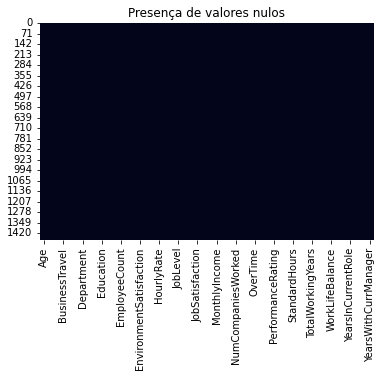

In [ ]:
# valores ausentes
sns.heatmap(turnover.isnull(), cbar = False);
plt.title('Presença de valores nulos');

Não há valores nulos no dataset.

In [ ]:
# transformando em variáveis binárias
turnover['Attrition'] = turnover['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) # nossa variável de interesse (target)
turnover['OverTime'] = turnover['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
turnover['Over18'] = turnover['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

### Distribuição da variável target (Attrition)

In [ ]:
turnover['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Os estão desbalanceados

### Estatistica descritiva do dataset 

In [ ]:
#estatistica descritiva 
turnover.describe().round(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,0.16,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,1.0,0.28,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,0.37,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,0.0,0.45,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,0.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,1.0,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,1.0,0.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,0.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,1.0,0.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,0.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,1.0,1.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,1.0,1.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


### Analisando as variáveis do dataset

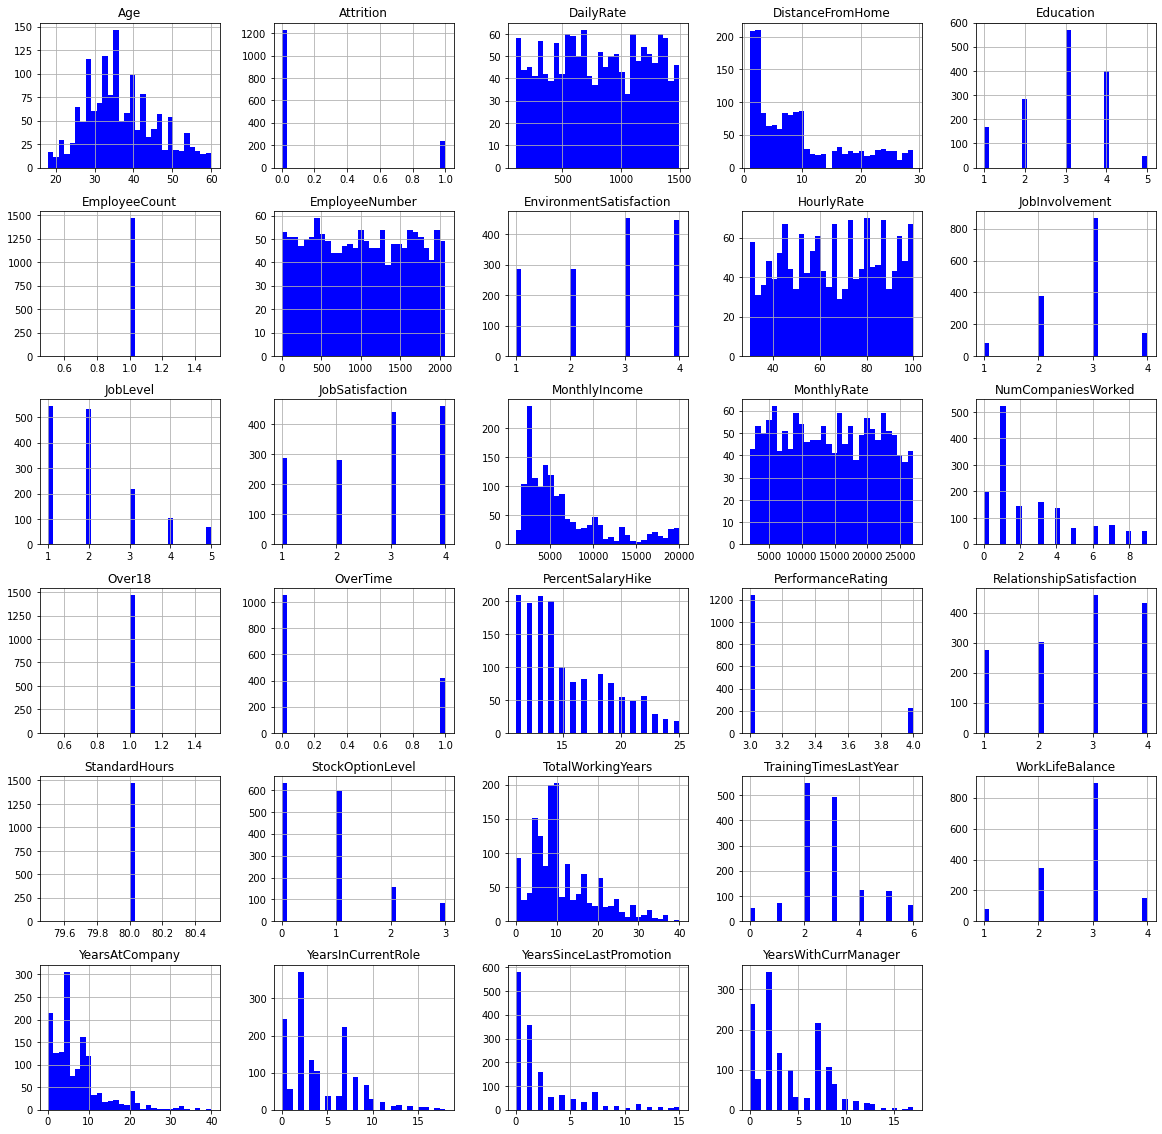

In [ ]:
turnover.hist(bins = 30, figsize=(20,20), color = 'b');

### Excluindo variáveis do dataset

In [ ]:
# variávis não importantes para o modelo
turnover.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [ ]:
# seperando o dataset entre os que sairam e os que ficaram
left_df = turnover[turnover['Attrition'] == 1]
stayed_df = turnover[turnover['Attrition'] == 0] 

In [ ]:
# resumo
print('Total = ', len(turnover))
print('Número de funcionários que saíram da empresa = ', len(left_df))
print('Porcentagem de funcionários que saíram da empresa = ', ((len(left_df) / len(turnover)) * 100))
print('Número de funcionários que ficaram na empresa = ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa = ', ((len(stayed_df) / len(turnover)) * 100))

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


# Data Preprocessing

In [ ]:
# pre-processamento das variáveis categóticas
X_cat = turnover[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
# aplicando o encoder nas variáveis categoricas
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
# shape dos dados categoricos
X_cat.shape

(1470, 26)

In [ ]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [ ]:
turnover['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1466,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1467,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1468,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [ ]:
# tratamento dos dados numéricos
X_numerical = turnover[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
# Usando os dados tratados 
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
# normalização
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
y = turnover['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
# balanceamento dos dados
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

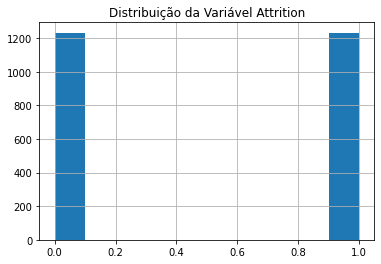

In [ ]:
y.hist();
plt.title('Distribuição da Variável Attrition');

Balanceamento dos dados pela classe majoritária.

In [ ]:
X.shape, y.shape

((2466, 50), (2466,))

### Separando treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((1726, 50), (740, 50))

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# reshape the dataset
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
x_train.shape, x_test.shape

((1726, 50, 1), (740, 50, 1))

### Criando o modelo

In [ ]:
# defin an object
model = tf.keras.models.Sequential()

In [ ]:
# definindo primeira camada
model.add(
    tf.keras.layers.Conv1D(
        filters=32, 
        kernel_size=3, 
        padding='same', 
        activation='relu', 
        input_shape = (x_train.shape[1], 1)
        )
    )
# batch normalization
model.add(tf.keras.layers.BatchNormalization())
# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# definindo a segunda camada
# second CNN layer
model.add(
    tf.keras.layers.Conv1D(
        filters=64, 
        kernel_size=3,
        padding='same', 
        activation='relu'
        )
    )
# batch normalization
model.add(tf.keras.layers.BatchNormalization())
# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

O modelo performou melhor com duas camadas.

In [ ]:
# third CNN layer
#model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
# batch normalization
#model.add(tf.keras.layers.BatchNormalization())
# maxpool layer
#model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer
#model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# primeira camada densa
# first dense layer (fully connected layer)
model.add(
    tf.keras.layers.Dense(
        units=256, 
        activation='relu')
    )
# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# output layer
model.add(
    tf.keras.layers.Dense(
        units=1, 
        activation='sigmoid'
        )
    )

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 50, 32)            128       
                                                                 
 batch_normalization_14 (Bat  (None, 50, 32)           128       
 chNormalization)                                                
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 25, 32)           0         
 g1D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 25, 32)            0         
                                                                 
 conv1d_20 (Conv1D)          (None, 25, 64)            6208      
                                                                 
 batch_normalization_15 (Bat  (None, 25, 64)          

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [ ]:
# compile the model
model.compile(
    optimizer=opt, 
    loss='binary_crossentropy', 
    metrics=['accuracy']
    )

# Training the model

In [ ]:
history =  model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
54/54 [==============================] - 2s 19ms/step - loss: 1.0661 - accuracy: 0.5261 - val_loss: 0.6898 - val_accuracy: 0.5797
Epoch 2/200
54/54 [==============================] - 1s 13ms/step - loss: 0.8548 - accuracy: 0.5956 - val_loss: 0.6821 - val_accuracy: 0.6378
Epoch 3/200
54/54 [==============================] - 1s 13ms/step - loss: 0.8250 - accuracy: 0.6211 - val_loss: 0.6735 - val_accuracy: 0.5554
Epoch 4/200
54/54 [==============================] - 1s 15ms/step - loss: 0.7471 - accuracy: 0.6593 - val_loss: 0.6679 - val_accuracy: 0.5176
Epoch 5/200
54/54 [==============================] - 1s 14ms/step - loss: 0.7129 - accuracy: 0.6738 - val_loss: 0.6692 - val_accuracy: 0.5149
Epoch 6/200
54/54 [==============================] - 1s 14ms/step - loss: 0.7078 - accuracy: 0.6767 - val_loss: 0.6787 - val_accuracy: 0.5216
Epoch 7/200
54/54 [==============================] - 1s 13ms/step - loss: 0.6656 - accuracy: 0.6819 - val_loss: 0.6603 - val_accuracy: 0.5595
Epoch 

In [ ]:
# model predictions
y_pred=model.predict(x_test)

In [ ]:
# prevendo para o indice 12
print(y_pred[12]), print(y_test[12])

[0.23459539]
0


(None, None)

In [ ]:
# substituindo os valores para 0 e 1
y_pred=[1 if y>=0.5 else 0 for y in y_pred]

# Diagnostic the model

In [ ]:
# confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[317  59]
 [ 15 349]]


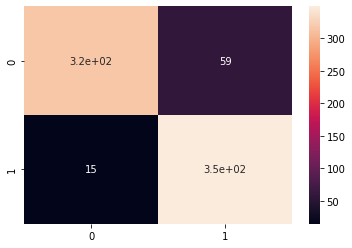

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       376
           1       0.86      0.96      0.90       364

    accuracy                           0.90       740
   macro avg       0.91      0.90      0.90       740
weighted avg       0.91      0.90      0.90       740



In [ ]:
def learning_curve(history, epoch):
  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

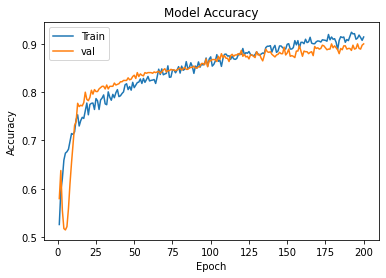

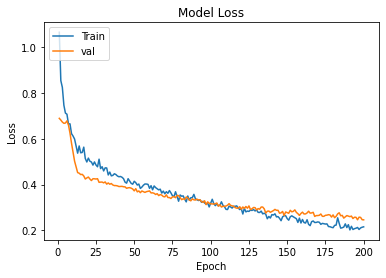

In [ ]:
learning_curve(history, 200)